In [ ]:
import pandas as pd
from IPython.display import display



# on importe les data set


interactions = pd.read_csv(





    "C:\\Users\\33618\\OneDrive\\Documents\\Cours Telecom\\kit data\\archive\\RAW_interactions.csv")

recipes = pd.read_csv(
    "C:\\Users\\33618\\OneDrive\\Documents\\Cours Telecom\\kit data\\sujet\\RAW_recipes.csv")

#

In [3]:
print(interactions.head())
print(recipes.head())

   user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...  
                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

  

In [4]:
print(interactions.shape)
print(recipes.shape)

(1132367, 5)
(231637, 12)


In [5]:
print(set(interactions.columns))
print(set(recipes.columns))

{'date', 'review', 'rating', 'recipe_id', 'user_id'}
{'id', 'nutrition', 'n_steps', 'name', 'submitted', 'tags', 'ingredients', 'n_ingredients', 'description', 'steps', 'contributor_id', 'minutes'}


In [6]:
print(recipes.info())
print(interactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user

On change le type de la colonne date dans interactions: object => datetime 

In [ ]:
interactions['date'] = pd.to_datetime(interactions['date'])
print(interactions.info())

recipes['submitted'] = pd.to_datetime(recipes['submitted'])

recipes['submitted'] = pd.to_datetime(recipes['submitted'])

recipes['n_steps'] = recipes['n_steps'].astype(int)
print(recipes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  int64         
 1   recipe_id  1132367 non-null  int64         
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   review     1132198 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 43.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231637 non-null  int64         
 2   minutes         231637 non-null  int64         
 3   contributor_id  231637 non-null  int64         
 4   submitted       231637 non-null  dat

On vérifie les nuls

=> suppression d'une recette sans titre (recipe)
=> 4979 description vides remplacés par "No description available"

=> 169 review vides remplacées par "No review available" (interactions)



In [10]:
print(recipes.isnull().sum())
print(interactions.isnull().sum())

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [ ]:
recipes['description'] = recipes['description'].fillna(
    'No description available')
recipes = recipes.dropna(subset=['name'])

interactions['review'] = interactions.review.fillna('No review available')

In [14]:
print(recipes.isnull().sum())
print(interactions.isnull().sum())

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64
user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64


On vérifie les doublons

In [15]:
print(recipes.duplicated().sum())
print(interactions.duplicated().sum())

0
0


On vérifie les valeurs aberrantes

les minutes et les steps semblent anormales. 

In [22]:
print(recipes[['minutes', 'n_steps', 'n_ingredients']].describe())

print(interactions[['date', 'rating']].describe())

            minutes        n_steps  n_ingredients
count  2.316360e+05  231636.000000  231636.000000
mean   9.398587e+03       9.765516       9.051149
std    4.461973e+06       5.995136       3.734803
min    0.000000e+00       0.000000       1.000000
25%    2.000000e+01       6.000000       6.000000
50%    4.000000e+01       9.000000       9.000000
75%    6.500000e+01      12.000000      11.000000
max    2.147484e+09     145.000000      43.000000
                                date        rating
count                        1132367  1.132367e+06
mean   2009-05-13 02:57:38.777586944  4.411016e+00
min              2000-01-25 00:00:00  0.000000e+00
25%              2007-03-11 00:00:00  4.000000e+00
50%              2008-12-29 00:00:00  5.000000e+00
75%              2011-03-07 00:00:00  5.000000e+00
max              2018-12-20 00:00:00  5.000000e+00
std                              NaN  1.264752e+00


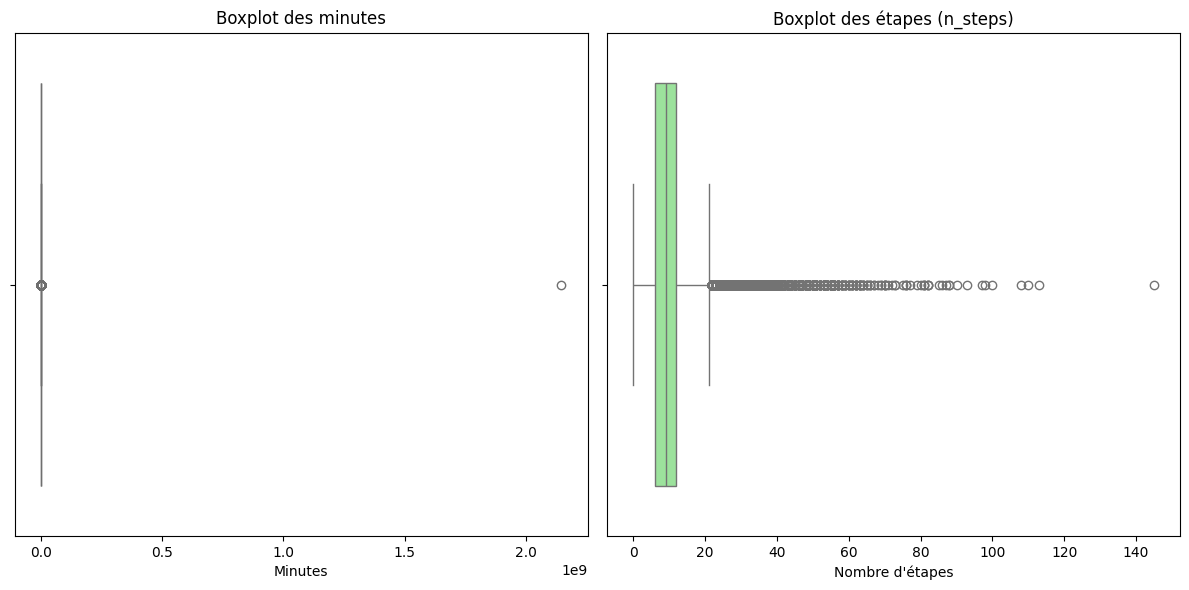

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuster la taille de la figure pour une meilleure visualisation
plt.figure(figsize=(12, 6))

# Boxplot pour 'minutes'
plt.subplot(1, 2, 1)  # Première colonne
sns.boxplot(x=recipes['minutes'], color='skyblue')
plt.title('Boxplot des minutes')
plt.xlabel('Minutes')

# Boxplot pour 'n_steps'
plt.subplot(1, 2, 2)  # Deuxième colonne
sns.boxplot(x=recipes['n_steps'], color='lightgreen')
plt.title('Boxplot des étapes (n_steps)')
plt.xlabel('Nombre d\'étapes')

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

# Définir les intervalles de temps (en minutes)
bins = [0, 30, 60, 300, 1440, 2880, 5760,
        10080, float('inf')]  # Catégories définies
labels = ['0-30 min', '30-60 min', '1-5 h', '5-24 h',
          '24-48 h', '2-4j', '4-7', '7+']  # Noms des catégories

# Créer une nouvelle colonne catégorisant les durées
recipes['time_category'] = pd.cut(
    recipes['minutes'], bins=bins, labels=labels, right=False)

# Compter le nombre de recettes dans chaque catégorie
category_counts = recipes['time_category'].value_counts().sort_index()


# Optionnel : Afficher les résultats sous forme de tableau pandas
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Number of Recipes']
display(category_counts_df)

,Category,Number of Recipes
0,0-30 min,80662
1,30-60 min,78166
2,1-5 h,62630
3,5-24 h,8058
4,24-48 h,1413
5,2-4j,356
6,4-7,91
7,7+,261


In [ ]:
# Supprimer les recettes dont les minutes dépassent 2880 (48 heures)
recipes = recipes[recipes['minutes'] <= 2881]

# Vérifier les dimensions après suppression
print(f"Nombre de recettes restantes : {recipes.shape[0]}")
# Vérifier la valeur maximale de la colonne 'minutes'
max_minutes = recipes['minutes'].max()
print(f"Durée maximale restante (en minutes) : {max_minutes}")

Nombre de recettes restantes : 230955
Durée maximale restante (en minutes) : 2880


In [ ]:
# Définir les intervalles de temps pour les étapes
# Catégories définies pour n_steps
bins_steps = [0, 10, 20, 30, 40, 60, 100, float('inf')]
labels_steps = ['0-10 steps', '10-20 steps', '20-30 steps', '30-40 steps',
                '40-60 steps', '60-100 steps', '100+ steps']  # Noms des catégories

# Créer une nouvelle colonne catégorisant les nombres d'étapes
recipes['steps_category'] = pd.cut(
    recipes['n_steps'], bins=bins_steps, labels=labels_steps, right=False)

# Compter le nombre de recettes dans chaque catégorie
category_counts_steps = recipes['steps_category'].value_counts().sort_index()

# Optionnel : Afficher les résultats sous forme de tableau pandas
category_counts_steps_df = category_counts_steps.reset_index()
category_counts_steps_df.columns = ['Category', 'Number of Recipes']
display(category_counts_steps_df)

,Category,Number of Recipes
0,0-10 steps,132334
1,10-20 steps,84250
2,20-30 steps,11882
3,30-40 steps,1879
4,40-60 steps,546
5,60-100 steps,59
6,100+ steps,5


In [ ]:
# Supprimer les recettes dont le nombre d'étapes est supérieur à 40
recipes = recipes[recipes['n_steps'] <= 40]

# Vérifier les dimensions après suppression
print(f"Nombre de recettes restantes : {recipes.shape[0]}")
# Vérifier la valeur maximale de n_steps restante
max_steps = recipes['n_steps'].max()
print(f"Nombre d'étapes maximal restant : {max_steps}")

Nombre de recettes restantes : 230425
Nombre d'étapes maximal restant : 40


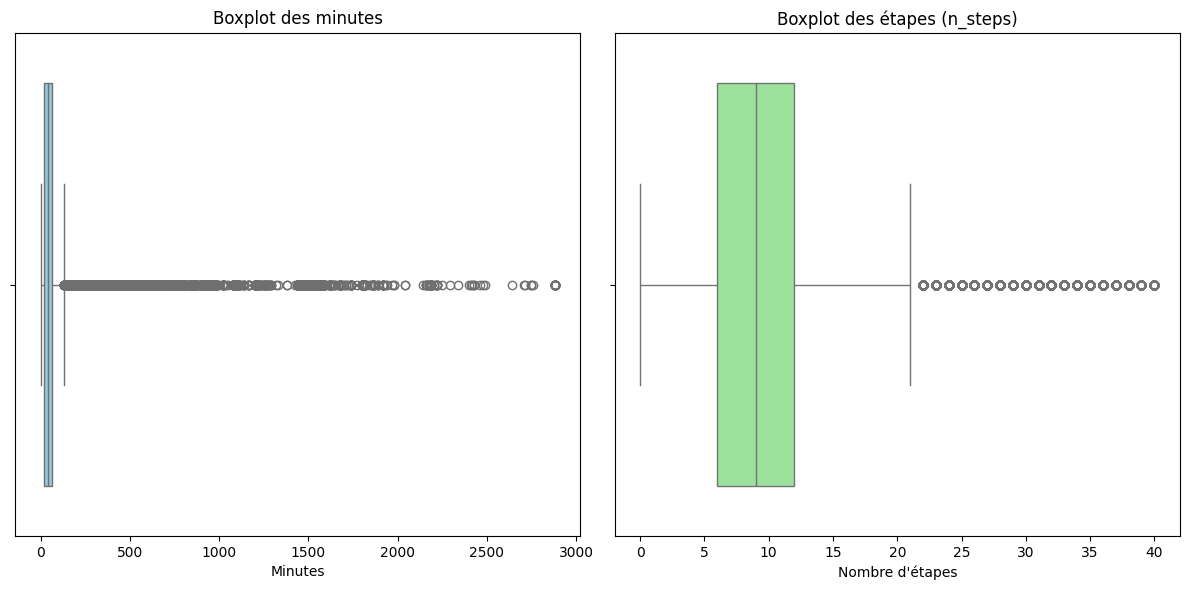

In [46]:
# Ajuster la taille de la figure pour une meilleure visualisation
plt.figure(figsize=(12, 6))

# Boxplot pour 'minutes'
plt.subplot(1, 2, 1)  # Première colonne
sns.boxplot(x=recipes['minutes'], color='skyblue')
plt.title('Boxplot des minutes')
plt.xlabel('Minutes')

# Boxplot pour 'n_steps'
plt.subplot(1, 2, 2)  # Deuxième colonne
sns.boxplot(x=recipes['n_steps'], color='lightgreen')
plt.title('Boxplot des étapes (n_steps)')
plt.xlabel('Nombre d\'étapes')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Normalisation du texte 


In [ ]:
recipes['tags'] = recipes['tags'].str.lower()
interactions['review'] = interactions['review'].str.lower()

On vérifie la cohérence des dates

In [21]:
print(recipes['submitted'].min(), recipes['submitted'].max())
print(interactions['date'].min(), interactions['date'].max())

1999-08-06 00:00:00 2018-12-04 00:00:00
2000-01-25 00:00:00 2018-12-20 00:00:00


In [ ]:
# Enregistrer le dataset recipes nettoyé
recipes.to_csv('clean_recipes.csv', index=False)

# Enregistrer le dataset interactions nettoyé
interactions.to_csv('clean_interactions.csv', index=False)

print("Les bases nettoyées ont été sauvegardées dans le répertoire courant.")

Les bases nettoyées ont été sauvegardées dans le répertoire courant.
